03 - Análisis Exploratorio de Datos (EDA) sobre el DataFrame 'Terminales de Almacenamiento de México' - Univariable.

Objetivo: Efectuar el análisis univariable del DataFrame para indagar el comportamiento de este. 

IMPORTACIÓN LIBRERÍAS

In [1]:
# Librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import normaltest

# Gráficos en línea
%matplotlib inline

# Formato de número
pd.set_option("display.float_format", "{:,.2f}".format)

# Estilo de fondo
sns.set_style(style='whitegrid')

# Estilo de escala y contexto
sns.set_context(context='notebook')

# Tamaño predeterminado a figuras
plt.rcParams['figure.figsize'] =(11,9.4)

Carga de archivos

In [2]:
terminales_mexico_df = pd.read_csv('../data/processed/terminales_méxico_clean.csv',
                                   index_col=0)

VISIÓN GENERAL DEL DATASET

In [3]:
terminales_mexico_df.head()

,ID_Terminal,Nombre_Terminal,Tipo_Terminal,Región,Estado,Tipos_Productos_Almacenar,Año,Capacidad_Diseño_barriles,Capacidad_Operativa_barriles
0,TAR_ACG_GRO,Acapulco,Terrestre,Sur,Guerrero,Gasolina;Diésel,2015,235000,145262
1,TAR_AGS_AGS,Aguascalientes,Terrestre,Occidente,Aguascalientes,Gasolina;Diésel,2015,105000,68241
2,TAR_AÑL_CDM,Añil,Terrestre,Centro,Ciudad de México,Gasolina;Diésel,2015,235000,158343
3,TAR_AZC_CDM,Azcapotzalco,Terrestre,Centro,Ciudad de México,Gasolina;Diésel;Turbosina,2015,1510000,1107981
4,TAR_BDM_CDM,Barranca del Muerto,Terrestre,Centro,Ciudad de México,Gasolina;Diésel,2015,125000,91526


Tipos de columnas

In [4]:
terminales_mexico_df.columns

Index(['ID_Terminal', 'Nombre_Terminal', 'Tipo_Terminal', 'Región', 'Estado',
       'Tipos_Productos_Almacenar', 'Año', 'Capacidad_Diseño_barriles',
       'Capacidad_Operativa_barriles'],
      dtype='object')

Tipos de variables

In [5]:
terminales_mexico_df.dtypes

ID_Terminal                     object
Nombre_Terminal                 object
Tipo_Terminal                   object
Región                          object
Estado                          object
Tipos_Productos_Almacenar       object
Año                              int64
Capacidad_Diseño_barriles        int64
Capacidad_Operativa_barriles     int64
dtype: object

Estadísticas básicas rápidas - Numéricas

In [6]:
terminales_mexico_df.describe()

,Año,Capacidad_Diseño_barriles,Capacidad_Operativa_barriles
count,79.00,79.00,79.00
mean,"2,015.00","397,126.58","305,811.00"
std,0.00,"728,997.51","633,770.49"
min,"2,015.00","10,000.00","5,926.00"
25%,"2,015.00","80,000.00","58,443.00"
50%,"2,015.00","148,000.00","112,462.00"
75%,"2,015.00","367,500.00","258,917.50"
max,"2,015.00","4,805,000.00","4,370,333.00"


Estadísticas básicas rápidas - Categóricas

In [7]:
terminales_mexico_df.describe(include='object')

,ID_Terminal,Nombre_Terminal,Tipo_Terminal,Región,Estado,Tipos_Productos_Almacenar
count,79,79,79,79,79,79
unique,79,78,2,8,30,6
top,TAR_ACG_GRO,Salina Cruz,Terrestre,Noroeste,Veracruz,Gasolina;Diésel
freq,1,2,73,15,11,69


ANÁLISIS UNIDIMENSIONAL DE LAS VARIABLES

Región

In [8]:
terminales_mexico_df['Región'].value_counts()

Región
Noroeste     15
Occidente    13
Noreste      13
Golfo        12
Centro       11
Sur           7
Norte         5
Sureste       3
Name: count, dtype: int64

Gráfica de Región

/tmp/ipykernel_8083/4010717243.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


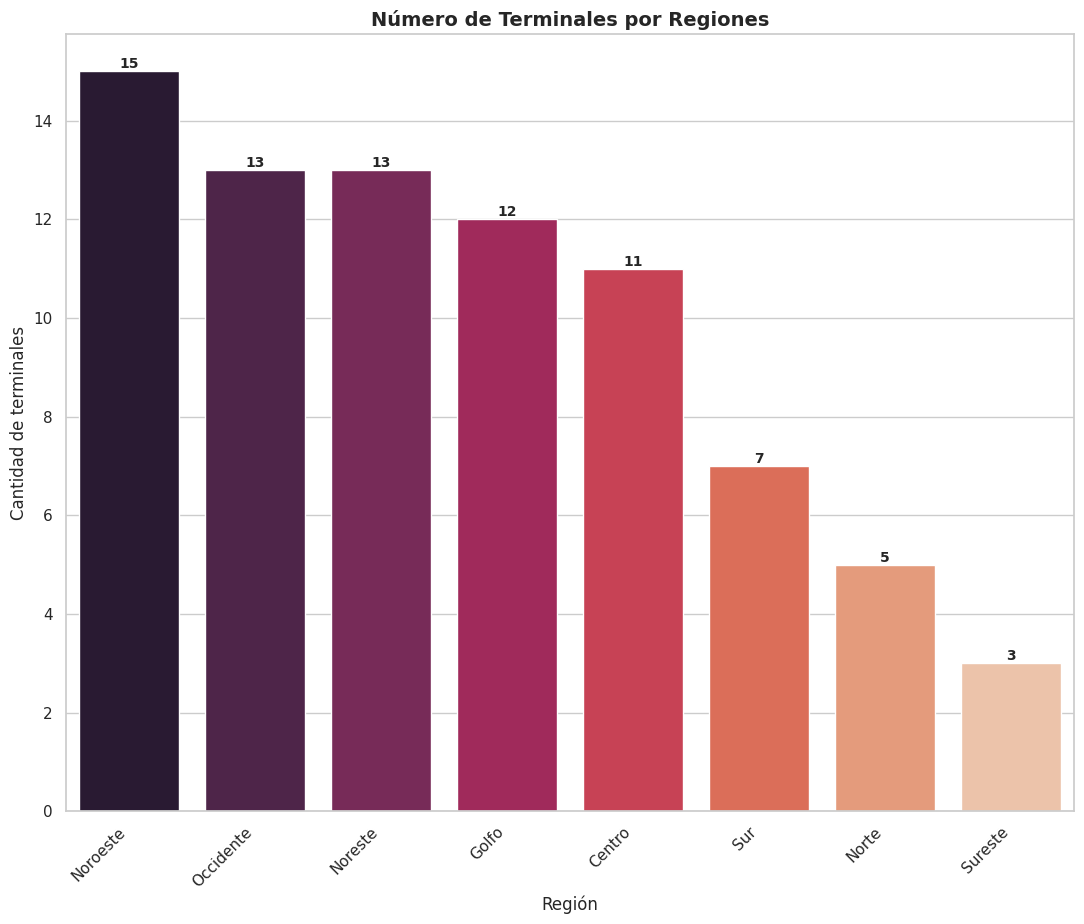

In [32]:
sns.countplot(
    data=terminales_mexico_df,
    x='Región',
    order=terminales_mexico_df['Región'].value_counts().index,
    palette='rocket'
)

for p in plt.gca().patches:
    plt.text(
        p.get_x() + p.get_width() / 2,   
        p.get_height(),            
        int(p.get_height()),             
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.title('Número de Terminales por Regiones', 
          fontsize=14, fontweight='bold')
plt.xlabel('Región', fontsize=12)
plt.ylabel('Cantidad de terminales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('../reports/figures/01_datos_generales/01_terminales_regiones.png',
            dpi=300, bbox_inches='tight')

Tipos de Terminales

/tmp/ipykernel_8083/849047030.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


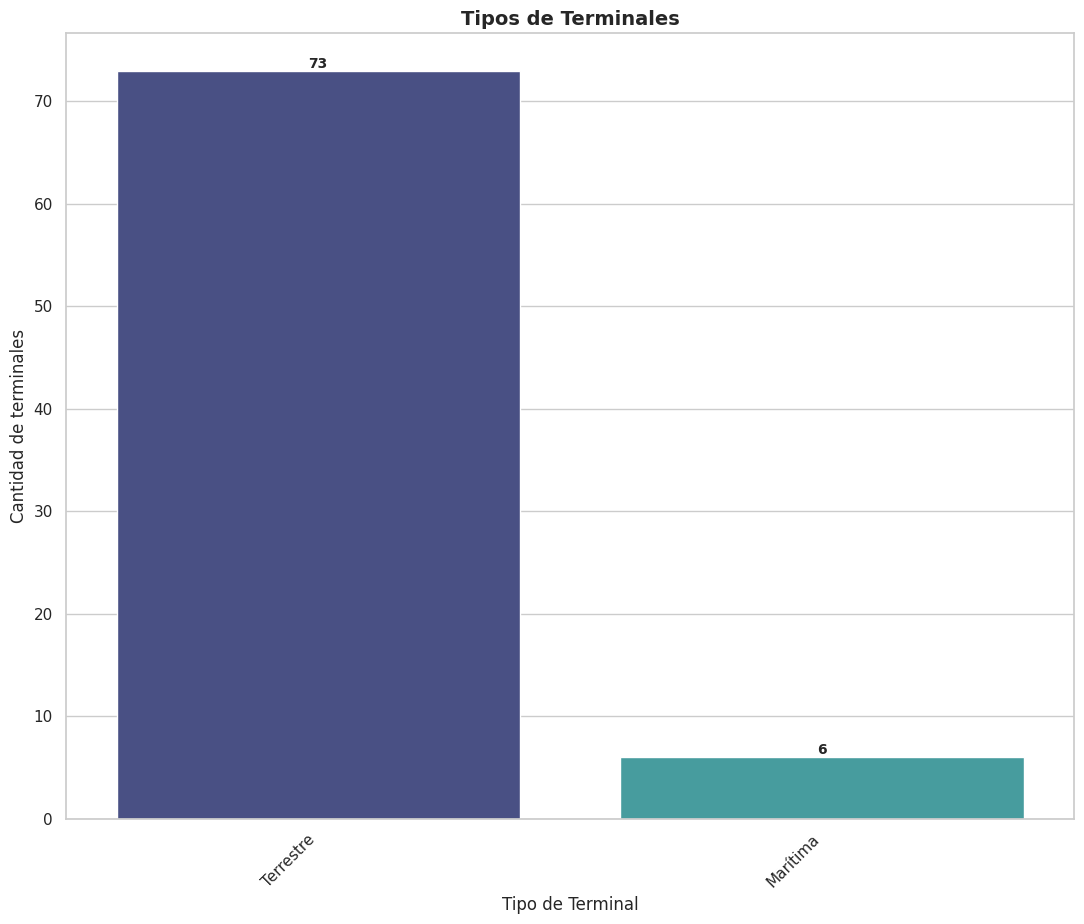

In [31]:
sns.countplot(
    data=terminales_mexico_df,
    x='Tipo_Terminal',
    palette='mako'
)

for p in plt.gca().patches:
    plt.text(
        p.get_x() + p.get_width() / 2,   
        p.get_height(),            
        int(p.get_height()),             
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.title('Tipos de Terminales', fontsize=14,
          fontweight='bold')

plt.xlabel('Tipo de Terminal', fontsize=12)
plt.ylabel('Cantidad de terminales', 
           fontweight=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('../reports/figures/01_datos_generales/02_tipos_terminales.png',
            dpi=300, bbox_inches='tight')

Estados

/tmp/ipykernel_8083/183606177.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


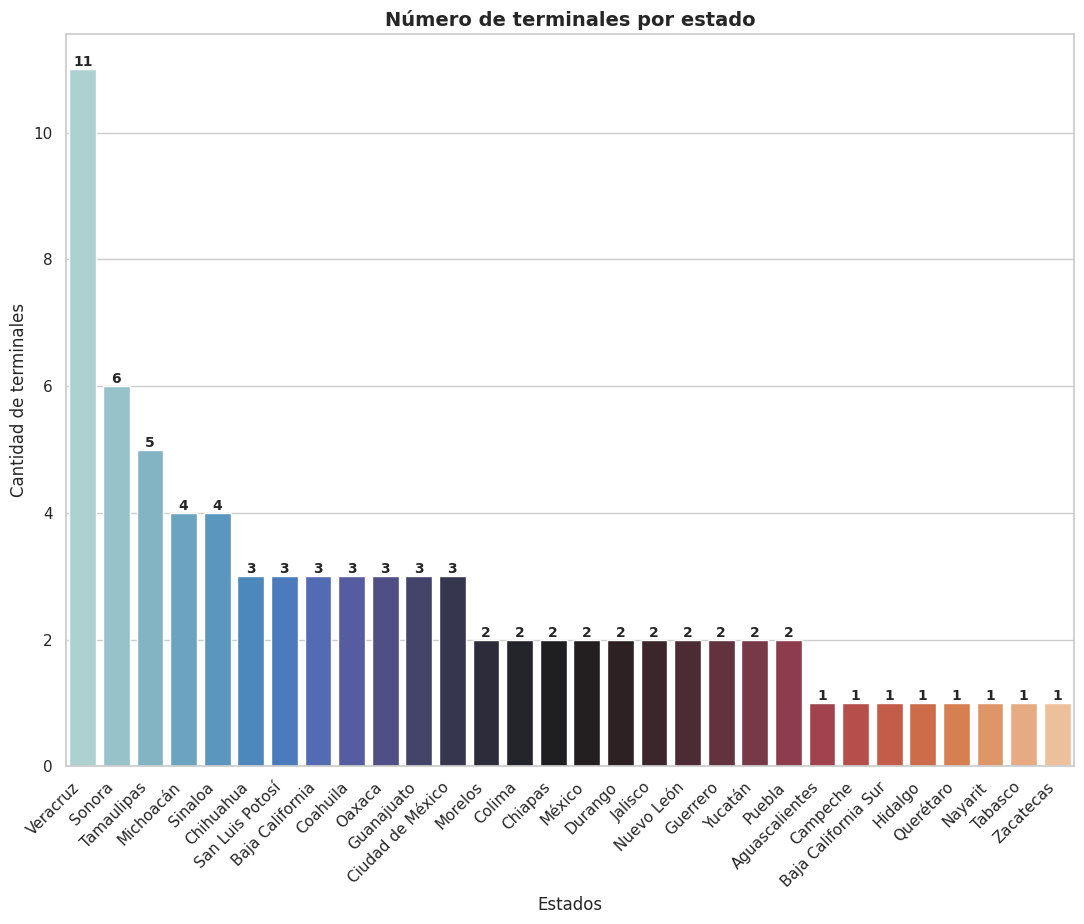

In [33]:
sns.countplot(
    data=terminales_mexico_df,
    x='Estado',
    order=terminales_mexico_df['Estado'].value_counts().index,
    palette='icefire'
)

for p in plt.gca().patches:
    plt.text(
        p.get_x() + p.get_width() / 2,   
        p.get_height(),            
        int(p.get_height()),             
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.title('Número de terminales por estado', 
          fontsize=14, fontweight='bold')

plt.xlabel('Estados')
plt.ylabel('Cantidad de terminales')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('../reports/figures/01_datos_generales/03_terminales_estado.png',
            dpi=300, bbox_inches='tight')

Productos

/tmp/ipykernel_8083/1527960543.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


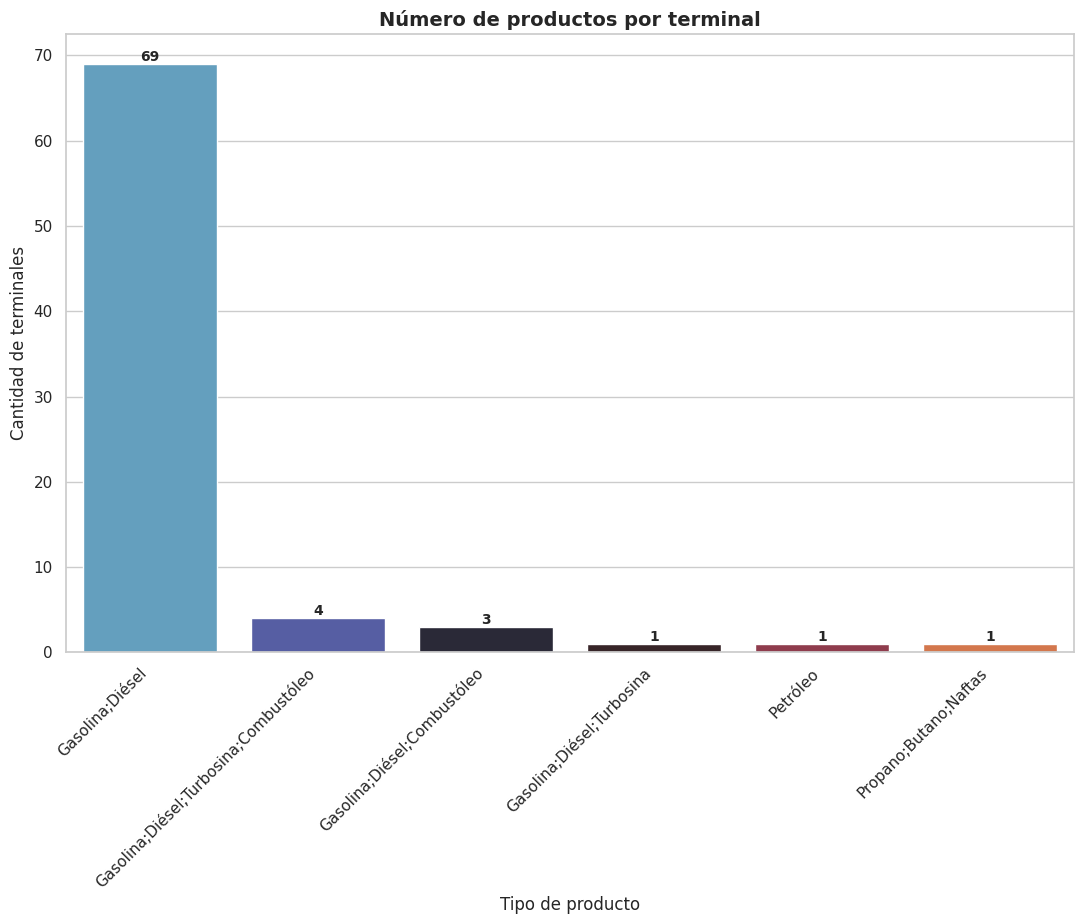

In [34]:
sns.countplot(
    data=terminales_mexico_df,
    x='Tipos_Productos_Almacenar',
    order=terminales_mexico_df['Tipos_Productos_Almacenar'].value_counts().index,
    palette='icefire'
)

for p in plt.gca().patches:
    plt.text(
        p.get_x() + p.get_width() / 2,   
        p.get_height(),            
        int(p.get_height()),             
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.title('Número de productos por terminal',
          fontsize=14, fontweight='bold')

plt.xlabel('Tipo de producto', fontsize=12)
plt.ylabel('Cantidad de terminales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('../reports/figures/01_datos_generales/04_productos_terminal.png',
            dpi=300, bbox_inches='tight')

Histograma de Capacidad de Diseño (barriles)

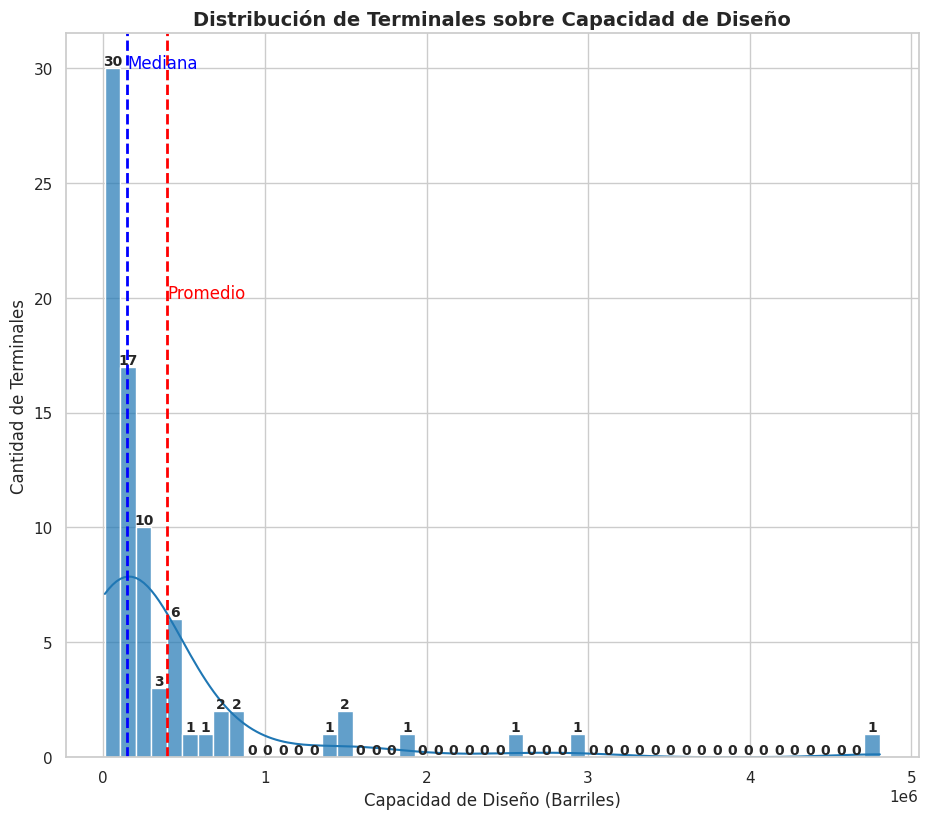

In [35]:
sns.histplot(
    data=terminales_mexico_df,
    x='Capacidad_Diseño_barriles',
    kde=True,
    bins=50,
    alpha=0.7
)

for p in plt.gca().patches:
    plt.text(
        p.get_x() + p.get_width() / 2,   
        p.get_height(),            
        int(p.get_height()),             
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.title("Distribución de Terminales sobre Capacidad de Diseño",
          fontsize=14, fontweight='bold')

plt.xlabel('Capacidad de Diseño (Barriles)')
plt.ylabel('Cantidad de Terminales')

plt.axvline(
    x=terminales_mexico_df['Capacidad_Diseño_barriles'].mean(),
    color='red',
    linestyle = 'dashed',
    linewidth = 2
)

plt.axvline(
    x=terminales_mexico_df['Capacidad_Diseño_barriles'].median(),
    color='blue',
    linestyle = 'dashed',
    linewidth = 2
)

plt.text(
    terminales_mexico_df.Capacidad_Diseño_barriles
    .mean(),20,'Promedio', fontsize=12, color='red'
)

plt.text(
    terminales_mexico_df.Capacidad_Diseño_barriles
    .median(),30,'Mediana', fontsize = 12, color='blue'
)

plt.savefig('../reports/figures/02_capacidades/01_histograma_capacidad_diseño.png',
            dpi=300, bbox_inches='tight')

Histograma de Capacidad Operativa (barriles)

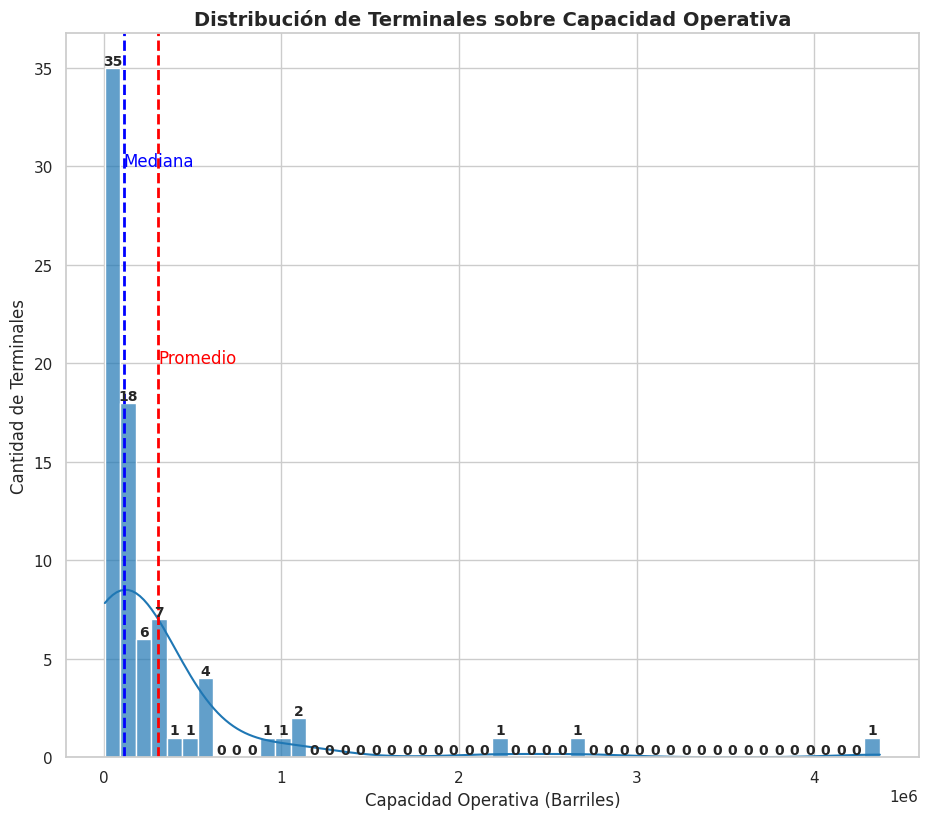

In [36]:
sns.histplot(
    data=terminales_mexico_df,
    x='Capacidad_Operativa_barriles',
    kde=True,
    bins=50,
    alpha=0.7
)

for p in plt.gca().patches:
    plt.text(
        p.get_x() + p.get_width() / 2,   
        p.get_height(),            
        int(p.get_height()),             
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.title("Distribución de Terminales sobre Capacidad Operativa",
          fontsize=14, fontweight='bold')

plt.xlabel('Capacidad Operativa (Barriles)')
plt.ylabel('Cantidad de Terminales')

plt.axvline(
    x=terminales_mexico_df['Capacidad_Operativa_barriles'].mean(),
    color='red',
    linestyle = 'dashed',
    linewidth = 2
)

plt.axvline(
    x=terminales_mexico_df['Capacidad_Operativa_barriles'].median(),
    color='blue',
    linestyle = 'dashed',
    linewidth = 2
)

plt.text(
    terminales_mexico_df.Capacidad_Operativa_barriles
    .mean(),20,'Promedio', fontsize=12, color='red'
)

plt.text(
    terminales_mexico_df.Capacidad_Operativa_barriles
    .median(),30,'Mediana', fontsize = 12, color='blue'
)

plt.savefig('../reports/figures/02_capacidades/02_histograma_capacidad_operativa.png',
            dpi=300, bbox_inches='tight')

Pruebas estadísticas de normalidad - Capacidad Diseño

In [15]:
stat, p = normaltest(terminales_mexico_df['Capacidad_Diseño_barriles'])
print(f"Normaltest Diseño -> estadístico={stat:.3f}, p-valor={p:.5f}")

Normaltest Diseño -> estadístico=96.402, p-valor=0.00000


Pruebas estadísticas de normalidad - Capacidad Operativa

In [16]:
stat, p = normaltest(terminales_mexico_df['Capacidad_Operativa_barriles'])
print(f"Normaltest Operativa -> estadístico={stat:.3f}, p-valor={p:.5f}")

Normaltest Operativa -> estadístico=108.465, p-valor=0.00000


Detección de Outliers / Valores Atípicos

Capacidad Diseño

In [17]:
Q1 = terminales_mexico_df['Capacidad_Diseño_barriles'].quantile(0.25)
Q3 = terminales_mexico_df['Capacidad_Diseño_barriles'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_iqr = terminales_mexico_df[
    (terminales_mexico_df['Capacidad_Diseño_barriles'] < limite_inferior) |
    (terminales_mexico_df['Capacidad_Diseño_barriles'] > limite_superior)
]

print(f'Outliers detectados (IQR): {len(outliers_iqr)}')

Outliers detectados (IQR): 9


Capacidad Operativa

In [18]:
Q1 = terminales_mexico_df['Capacidad_Operativa_barriles'].quantile(0.25)
Q3 = terminales_mexico_df['Capacidad_Operativa_barriles'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_iqr = terminales_mexico_df[
    (terminales_mexico_df['Capacidad_Operativa_barriles'] < limite_inferior) |
    (terminales_mexico_df['Capacidad_Operativa_barriles'] > limite_superior)
]

print(f'Outliers detectados (IQR): {len(outliers_iqr)}')

Outliers detectados (IQR): 9


BoxPlot - Capacidad de Diseño

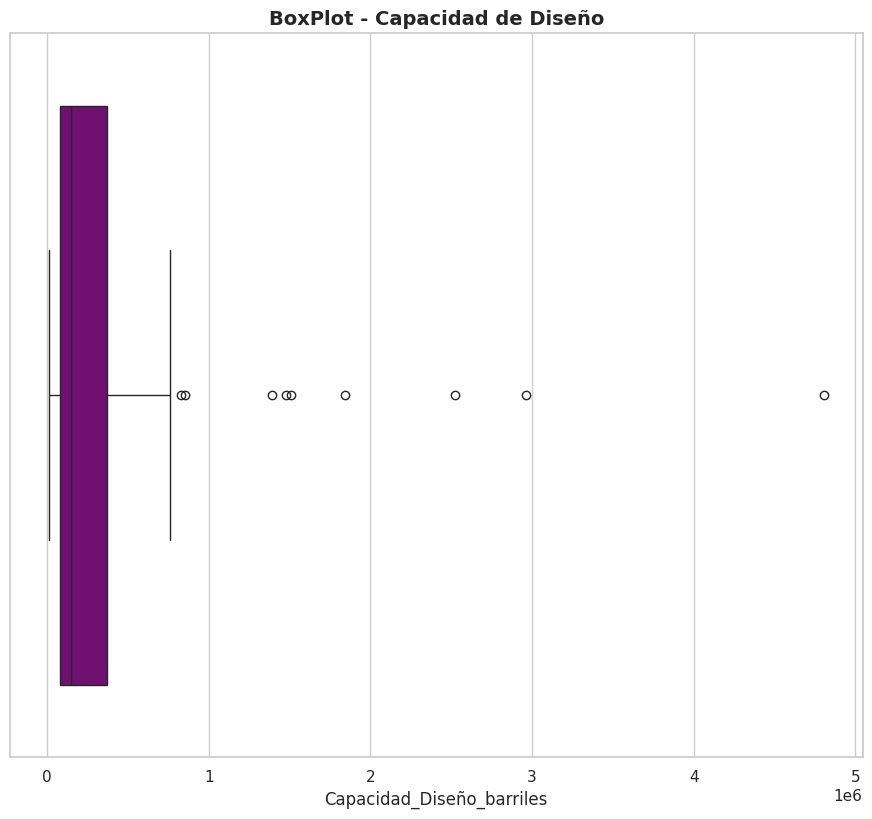

In [37]:
sns.boxplot(
    data=terminales_mexico_df,
    x='Capacidad_Diseño_barriles',
    color='purple'
)

plt.title('BoxPlot - Capacidad de Diseño',
          fontsize=14, fontweight='bold')

plt.savefig('../reports/figures/02_capacidades/03_boxplot_capacidad_diseño.png',
            dpi=300, bbox_inches='tight')

BoxPlot - Capacidad Operativa

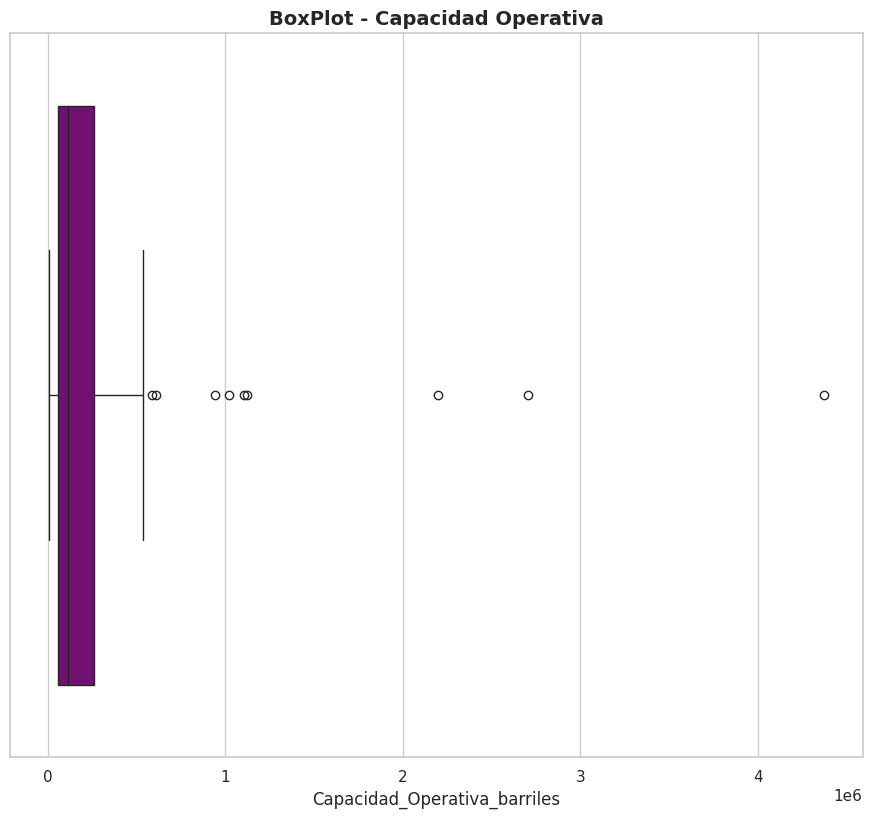

In [39]:
sns.boxplot(
    data=terminales_mexico_df,
    x='Capacidad_Operativa_barriles',
    color='purple'
)

plt.title('BoxPlot - Capacidad Operativa', 
          fontsize=14, fontweight='bold')

plt.savefig('../reports/figures/02_capacidades/04_boxplot_capacidad_operativa.png',
            dpi=300, bbox_inches='tight')

Histograma de Capacidad Diseño < 1,000,000 barriles

/tmp/ipykernel_8083/3160825240.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


Text(148000.0, 15, 'Mediana')

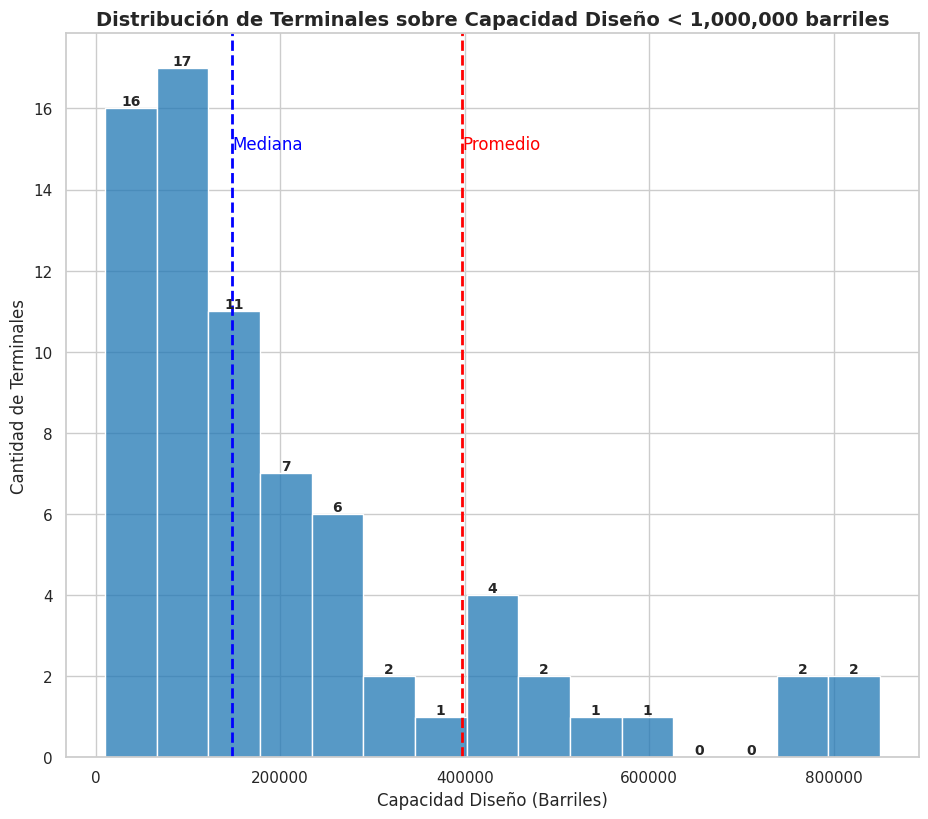

In [21]:
sns.histplot(
    data=terminales_mexico_df[terminales_mexico_df['Capacidad_Diseño_barriles'] < 1_000_000],
    x='Capacidad_Diseño_barriles',
    bins=15,
    palette='icefire'
)

for p in plt.gca().patches:
    plt.text(
        p.get_x() + p.get_width() / 2,   
        p.get_height(),            
        int(p.get_height()),             
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.title('Distribución de Terminales sobre Capacidad Diseño < 1,000,000 barriles',
          fontsize=14, fontweight='bold')

plt.xlabel('Capacidad Diseño (Barriles)')
plt.ylabel('Cantidad de Terminales')

plt.axvline(
    x=terminales_mexico_df['Capacidad_Diseño_barriles'].mean(),
    color='red',
    linestyle = 'dashed',
    linewidth = 2
)

plt.axvline(
    x=terminales_mexico_df['Capacidad_Diseño_barriles'].median(),
    color='blue',
    linestyle = 'dashed',
    linewidth = 2
)

plt.text(
    terminales_mexico_df.Capacidad_Diseño_barriles
    .mean(),15,'Promedio', fontsize=12, color='red'
)

plt.text(
    terminales_mexico_df.Capacidad_Diseño_barriles
    .median(),15,'Mediana', fontsize = 12, color='blue'
)

Histograma de Capacidad Diseño > 1,000,0000 barriles

/tmp/ipykernel_8083/2511138312.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


Text(0, 0.5, 'Cantidad de Terminales')

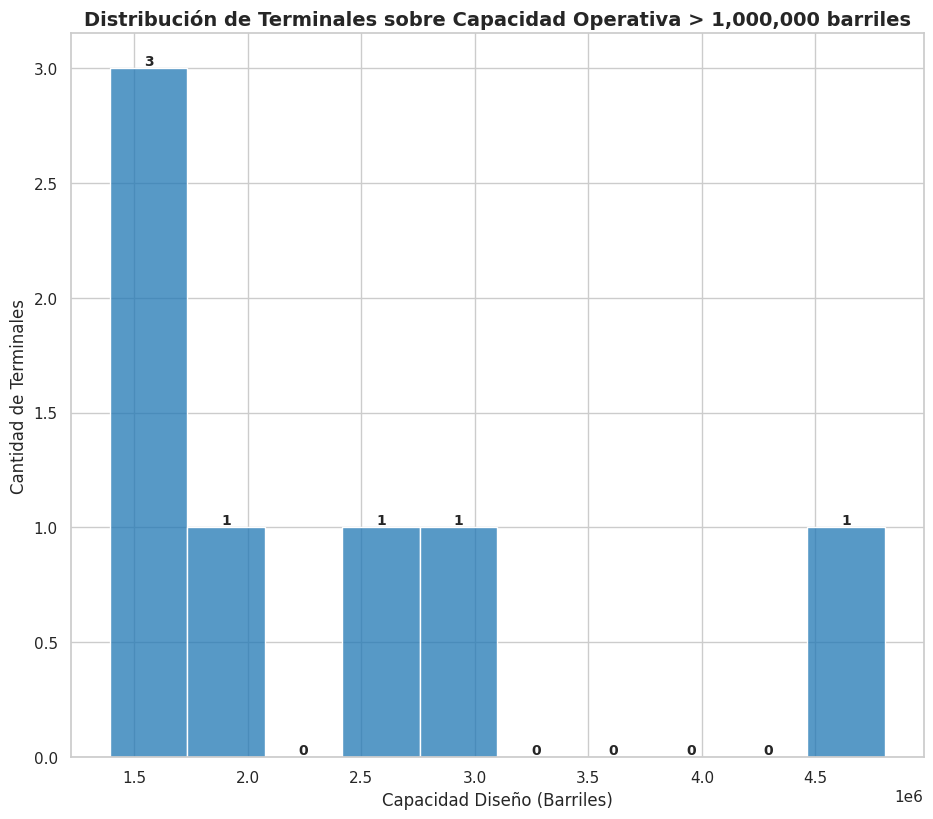

In [22]:
sns.histplot(
    data=terminales_mexico_df[terminales_mexico_df['Capacidad_Diseño_barriles'] > 1_000_000],
    x='Capacidad_Diseño_barriles',
    bins=10,
    palette='icefire'
)

for p in plt.gca().patches:
    plt.text(
        p.get_x() + p.get_width() / 2,   
        p.get_height(),            
        int(p.get_height()),             
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.title('Distribución de Terminales sobre Capacidad Operativa > 1,000,000 barriles',
          fontsize=14, fontweight='bold')

plt.xlabel('Capacidad Diseño (Barriles)')
plt.ylabel('Cantidad de Terminales')

Histograma de Capacidad Operativa < 1,000,000 barriles

Text(112462.0, 20, 'Mediana')

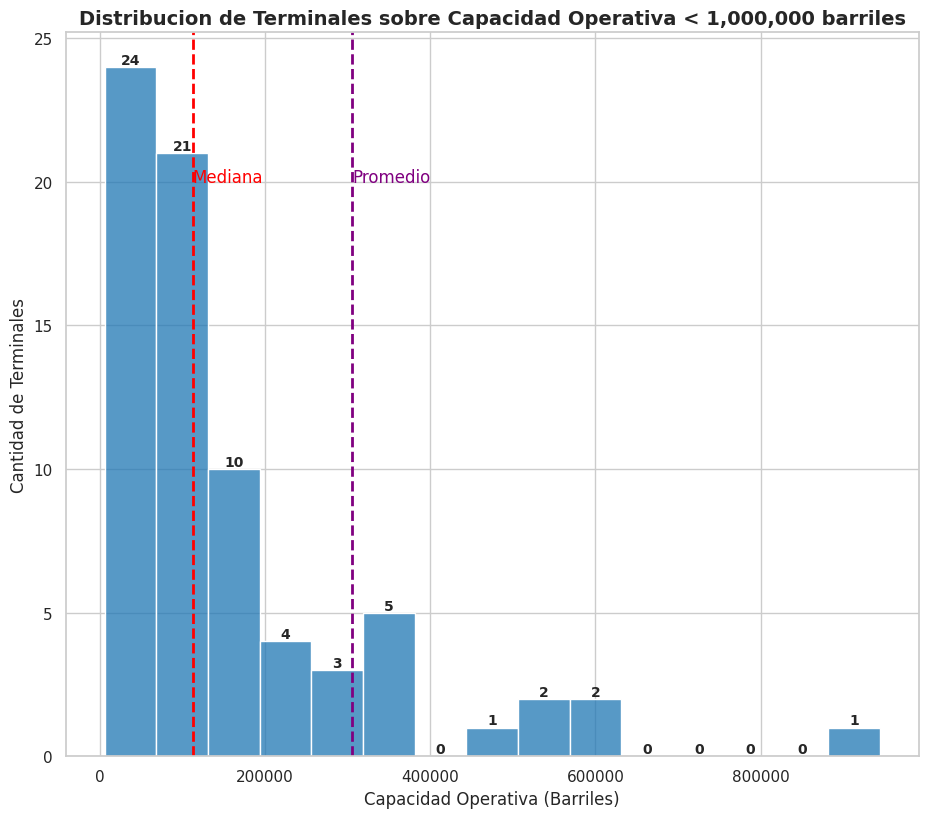

In [23]:
sns.histplot(
    data=terminales_mexico_df[terminales_mexico_df['Capacidad_Operativa_barriles'] < 1_000_000],
    x='Capacidad_Operativa_barriles',
    bins=15,
)

for p in plt.gca().patches:
    plt.text(
        p.get_x() + p.get_width() / 2,   
        p.get_height(),            
        int(p.get_height()),             
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.title('Distribucion de Terminales sobre Capacidad Operativa < 1,000,000 barriles',
          fontsize=14, fontweight='bold')

plt.xlabel('Capacidad Operativa (Barriles)')
plt.ylabel('Cantidad de Terminales')

plt.axvline(
    x=terminales_mexico_df['Capacidad_Operativa_barriles'].mean(),
    linestyle='dashed',
    linewidth=2,
    color='purple'
)

plt.text(
    terminales_mexico_df.Capacidad_Operativa_barriles
    .mean(),20,'Promedio', fontsize=12, color='purple'
)

plt.axvline(
    x=terminales_mexico_df['Capacidad_Operativa_barriles'].median(),
    linestyle='dashed',
    linewidth=2,
    color='red',
)

plt.text(
    terminales_mexico_df.Capacidad_Operativa_barriles
    .median(),20,'Mediana',fontsize=12, color='red'
)

Histograma de Capacidad Operativa (barriles) > 1,000,000 barriles

Text(0, 0.5, 'Cantidad de Terminales')

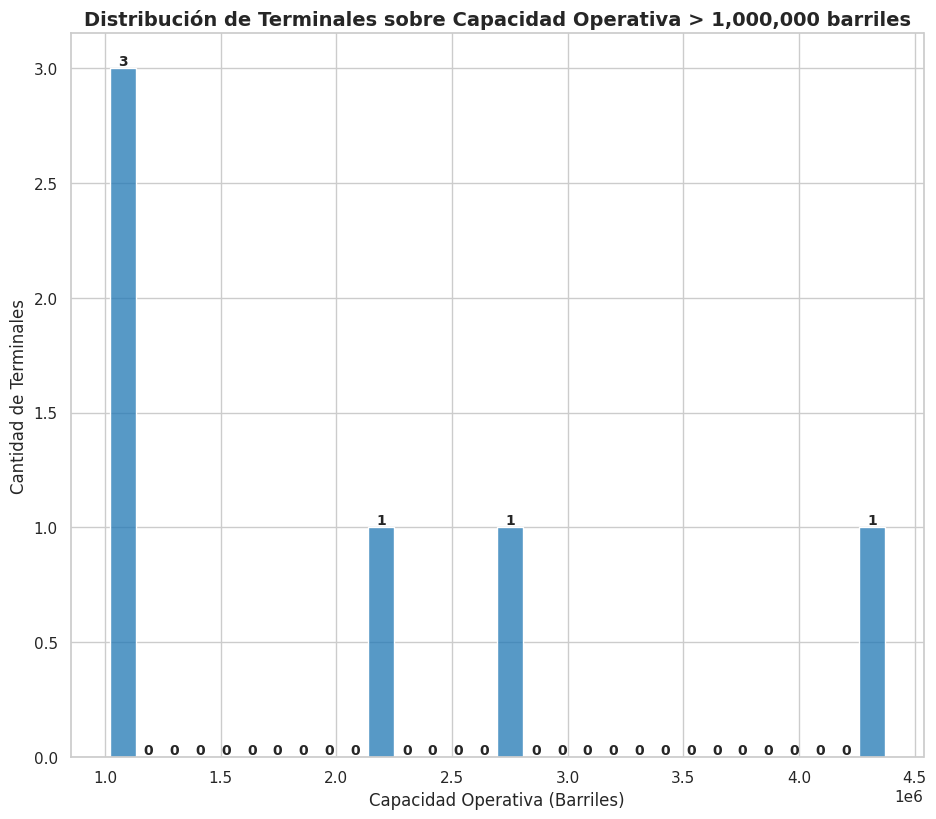

In [24]:
sns.histplot(
    data=terminales_mexico_df[terminales_mexico_df['Capacidad_Operativa_barriles'] > 1_000_000],
    x='Capacidad_Operativa_barriles',
    bins=30,
)

for p in plt.gca().patches:
    plt.text(
        p.get_x() + p.get_width() / 2,   
        p.get_height(),            
        int(p.get_height()),             
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )
    
plt.title('Distribución de Terminales sobre Capacidad Operativa > 1,000,000 barriles',
          fontsize=14, fontweight='bold')

plt.xlabel('Capacidad Operativa (Barriles)')
plt.ylabel('Cantidad de Terminales')

RESUMEN DE ANÁLISIS UNIVARIABLE

Resumen de Variables Numéricas (Capacidad Operativa (barriles) y Capacidad Diseño (barriles))

In [25]:
numeric_variables = ['Capacidad_Operativa_barriles', 'Capacidad_Diseño_barriles']

summary_table = []

for var in numeric_variables:
    total_len = len(terminales_mexico_df)
    minor_equal = (terminales_mexico_df[var] <= 1_000_000).sum()
    mayor = (terminales_mexico_df[var] > 1_000_000).sum()

    summary_table.append({
        'Variable': var,
        '> 1,000,000 barriles (N)': mayor,
        '<= 1,000,000 barriles (N)': minor_equal,
        '> 1,000,000 barriles (%)': (mayor/total_len) * 100,
        '<= 1,000,000 barriles (%)': (minor_equal/total_len) * 100,
        'Media (barriles)': terminales_mexico_df[var].mean(),
        'Mediana (barriles)': terminales_mexico_df[var].median(),
        'Desviación Estandar': terminales_mexico_df[var].std(),
    })

summary_numeric_table = pd.DataFrame(summary_table)
summary_numeric_table


,Variable,"> 1,000,000 barriles (N)","<= 1,000,000 barriles (N)","> 1,000,000 barriles (%)","<= 1,000,000 barriles (%)",Media (barriles),Mediana (barriles),Desviación Estandar
0,Capacidad_Operativa_barriles,6,73,7.59,92.41,"305,811.00","112,462.00","633,770.49"
1,Capacidad_Diseño_barriles,7,72,8.86,91.14,"397,126.58","148,000.00","728,997.51"


Resumen de Variables Categóricas (Región, Tipo de Terminal, Tipo de Productos Almacenar y Estado)

In [26]:
category_variables = ['Tipo_Terminal', 'Región', 'Estado', 'Tipos_Productos_Almacenar']

summary_category = {}

for var in category_variables:
    table = (
        terminales_mexico_df[var]
        .value_counts()
        .rename_axis(var)
        .reset_index(name='Cantidad_Terminales')
    )

    table['Proporción (%)'] = (
        table['Cantidad_Terminales']/table['Cantidad_Terminales'].sum() * 100
    )

    summary_category[var] = table

for var, table in summary_category.items():
    print(f"Distribución de Terminales por {var}:")
    display(table)

Distribución de Terminales por Tipo_Terminal:


,Tipo_Terminal,Cantidad_Terminales,Proporción (%)
0,Terrestre,73,92.41
1,Marítima,6,7.59


Distribución de Terminales por Región:


,Región,Cantidad_Terminales,Proporción (%)
0,Noroeste,15,18.99
1,Occidente,13,16.46
2,Noreste,13,16.46
3,Golfo,12,15.19
4,Centro,11,13.92
5,Sur,7,8.86
6,Norte,5,6.33
7,Sureste,3,3.80


Distribución de Terminales por Estado:


,Estado,Cantidad_Terminales,Proporción (%)
0,Veracruz,11,13.92
1,Sonora,6,7.59
2,Tamaulipas,5,6.33
3,Michoacán,4,5.06
4,Sinaloa,4,5.06
5,Chihuahua,3,3.80
6,San Luis Potosí,3,3.80
7,Baja California,3,3.80
8,Coahuila,3,3.80
9,Oaxaca,3,3.80


Distribución de Terminales por Tipos_Productos_Almacenar:


,Tipos_Productos_Almacenar,Cantidad_Terminales,Proporción (%)
0,Gasolina;Diésel,69,87.34
1,Gasolina;Diésel;Turbosina;Combustóleo,4,5.06
2,Gasolina;Diésel;Combustóleo,3,3.80
3,Gasolina;Diésel;Turbosina,1,1.27
4,Petróleo,1,1.27
5,Propano;Butano;Naftas,1,1.27
